<a href="https://colab.research.google.com/github/joaovictojuliao/Squad-2-M4/blob/aline---perguntas-9-e-10/M4_Squad_2_Projeto_Final_an%C3%A1lise_explorat%C3%B3ria_pre%C3%A7os_de_combust%C3%ADveis_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória dos Preços de Combustíveis no Brasil**

# **1. Introdução**

- Falar do objetivo e contexto da indústria dos combustíveis

Explicando como o preço dos combustíveis é formado
https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/composicao-e-estruturas-de-formacao-dos-precos

# **2. Apresentando os dados originais**



### **2.1 - Importação e concatenação**
 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
# Importando a biblioteca Pandas, Matplotlib e Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando dados do mês de julho:

combustiveis_julho = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-07.csv", sep = ';')

# Importando dados do mês de agosto:

combustiveis_agosto = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-08.csv", sep=';')

In [5]:
#Criando um novo dataset com a junção das tabelas anteriores:

combustiveis = pd.concat([combustiveis_julho, combustiveis_agosto])

### **2.2 -  Conhencendo a estrutura geral dos dados**

In [6]:
# Identificando o formato do dataset original
# O output retorna a quantidade de linhas e colunas, respectivamente:
combustiveis.shape

(127176, 16)

In [7]:
# Visualizando o dataset
# O output retorna as 5 primeiras e 5 últimas linhas do dataframe.

combustiveis

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,31/08/2022,"3,99",NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,31/08/2022,"5,27",NaN,R$ / litro,BRANCA


In [8]:
# Conferindo os tipos de dados do dataset:
display(combustiveis.dtypes)

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

### **2.2 Conclusões**

# **3. Tratamento inicial dos dados**

In [9]:
# Eliminando as colunas desnecessárias para a análise:
combustiveis.drop(["CNPJ da Revenda", "Nome da Rua", "Numero Rua", "Complemento", "Bairro", "Cep", "Valor de Compra", "Unidade de Medida"], axis=1, inplace=True)

In [10]:
# Definindo a coluna 'Produto' como novo índex para o dataset:
combustiveis = combustiveis.set_index('Produto')

In [11]:
#Convertendo a coluna 'Valor de Venda' para tipo float e alterando o separador decimal para ponto:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',','.').astype(float)

In [12]:
#Convertendo a coluna 'Data da Coleta' para tipo datetime:
combustiveis['Data da Coleta'] = pd.to_datetime( combustiveis['Data da Coleta'], format="%d/%m/%Y")
combustiveis


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Data da Coleta,Valor de Venda,Bandeira
Produto,,,,,,,
GASOLINA ADITIVADA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.48,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.38,VIBRA ENERGIA
ETANOL,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,5.99,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,7.39,VIBRA ENERGIA
GASOLINA ADITIVADA,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,2022-07-01,6.49,IPIRANGA
...,...,...,...,...,...,...,...
ETANOL,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,3.99,IPIRANGA
GASOLINA,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,5.19,IPIRANGA
GASOLINA ADITIVADA,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,5.19,IPIRANGA


# **4. Verificando a qualidade dos dados**

### **4.1 - Identificando dados nulos**

In [13]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127176 entries, GASOLINA ADITIVADA to ETANOL
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Regiao - Sigla  127176 non-null  object        
 1   Estado - Sigla  127176 non-null  object        
 2   Municipio       127176 non-null  object        
 3   Revenda         127176 non-null  object        
 4   Data da Coleta  127176 non-null  datetime64[ns]
 5   Valor de Venda  127176 non-null  float64       
 6   Bandeira        127176 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.8+ MB


### **4.2 - Identificando dados duplicados:**

In [14]:
combustiveis.value_counts()

Regiao - Sigla  Estado - Sigla  Municipio       Revenda                                               Data da Coleta  Valor de Venda  Bandeira     
CO              DF              BRASILIA        CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                2022-07-26      5.93            BRANCA           12
N               RO              PORTO VELHO     AUTO POSTO CALAMA LTDA                                2022-08-10      5.29            ATEM' S          10
CO              DF              BRASILIA        CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                2022-08-09      5.45            BRANCA            8
S               SC              JARAGUA DO SUL  POSTO CIDADE LTDA                                     2022-07-28      5.38            VIBRA ENERGIA     8
CO              DF              BRASILIA        CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                2022-08-31      5.23            BRANCA            8
                                                                                  

In [15]:
#Retirando os dados duplicados:
combustiveis.drop_duplicates()


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Data da Coleta,Valor de Venda,Bandeira
Produto,,,,,,,
GASOLINA ADITIVADA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.48,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.38,VIBRA ENERGIA
ETANOL,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,5.99,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,7.39,VIBRA ENERGIA
GASOLINA ADITIVADA,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,2022-07-01,6.49,IPIRANGA
...,...,...,...,...,...,...,...
ETANOL,NE,PE,RECIFE,BRAZ COMBUSTIVEIS EIRELI,2022-08-31,4.29,BRANCA
ETANOL,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,3.99,IPIRANGA
GASOLINA,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,5.19,IPIRANGA


### **4.3 - Identificando outliers - Histogramas**

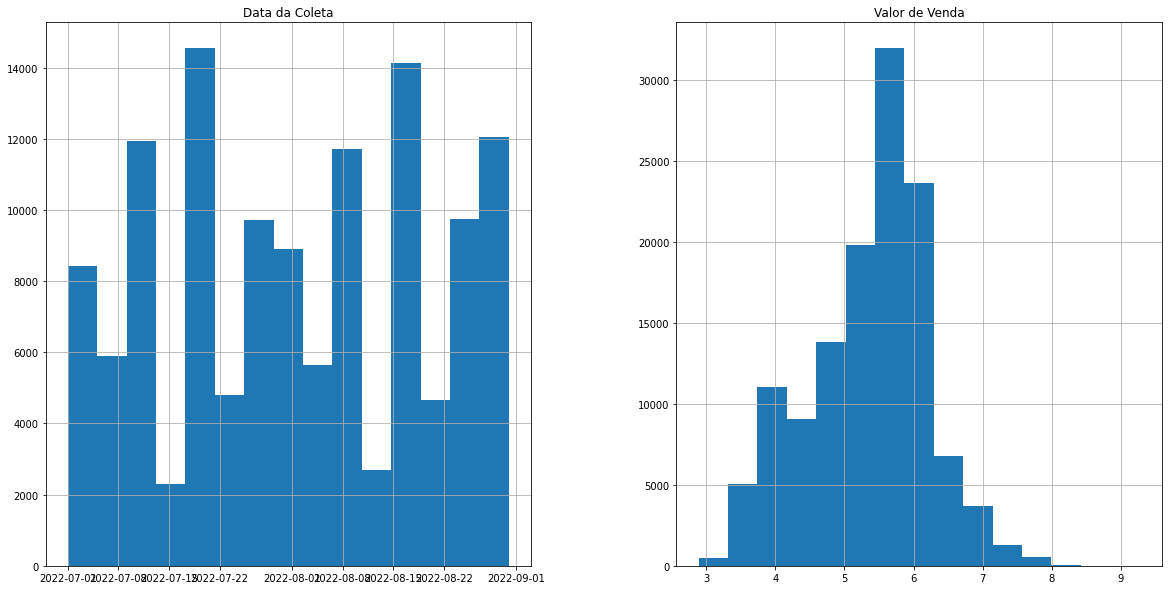

In [16]:
# Visualizando a distribuição da variável 'Valor de Venda'
combustiveis.hist(bins=15, figsize=(20,10));

### **4.4 - Identificando outliers - estatísticas descritivas**

In [17]:
#Principais estatísticas usando a função describe:
combustiveis.describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


### **4.5 - Identificando outliers - Boxplots**

In [18]:
gasolina_comum = combustiveis.loc['GASOLINA']
gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA']
etanol = combustiveis.loc['ETANOL']
gasolina_comum

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Data da Coleta,Valor de Venda,Bandeira
Produto,,,,,,,
GASOLINA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.38,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,7.39,VIBRA ENERGIA
GASOLINA,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,2022-07-01,5.99,IPIRANGA
GASOLINA,CO,GO,GOIANIA,VIENA AUTO POSTO EIRELI,2022-07-01,6.69,BRANCA
GASOLINA,NE,PI,TERESINA,T. M. VALENÇA LTDA.,2022-07-01,7.77,BRANCA
...,...,...,...,...,...,...,...
GASOLINA,NE,BA,VITORIA DA CONQUISTA,VITORIA - PETRO DERIVADOS DE PETROLEO LTDA,2022-08-31,5.79,VIBRA ENERGIA
GASOLINA,NE,BA,IRECE,AUTO POSTO NORDESTE LTDA,2022-08-31,5.38,BRANCA
GASOLINA,NE,PE,RECIFE,BRAZ COMBUSTIVEIS EIRELI,2022-08-31,4.95,BRANCA


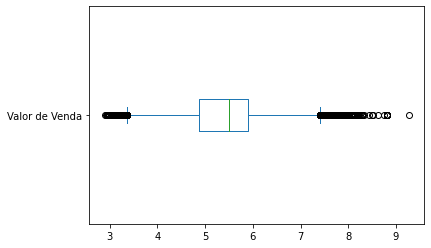

In [19]:
# Considerando todos os combustíveis: gasolina comum, gasolina aditivada e etanol
bp1 = pd.DataFrame(combustiveis, columns=["Valor de Venda"])
bp1.plot.box(vert=False);

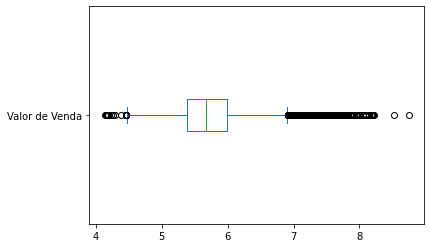

In [20]:
# Considerando apenas os preços da gasolina comum:

bp2 = pd.DataFrame(gasolina_comum, columns=["Valor de Venda"])
bp2.plot.box(vert=False);

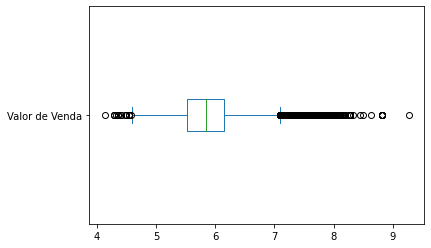

In [21]:
# Considerando apenas os preços da gasolina aditivada:
gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA']
bp3 = pd.DataFrame(gasolina_aditivada, columns=["Valor de Venda"])
bp3.plot.box(vert=False);

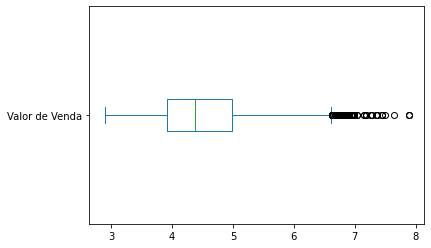

In [22]:
# Considerando apenas os preços do etanol:
etanol = combustiveis.loc['ETANOL']
bp4 = pd.DataFrame(etanol, columns=["Valor de Venda"])
bp4.plot.box(vert=False);


### **4.6 - Conclusões iniciais sobre outliers no dataset**



* Retirar os outliers e calcular novamente dados como média, desvio-padrão, etc para entender o seu impacto.







### **4.7 - Retirando os outliers**

### **4.8 - Calculando novamente as medidas descritivas**

### **4.9 - Conclusões finais sobre outliers no dataset**

# **5. Análise Exploratória**

**Pergunta 1: Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram um aumento ou diminuição?**

(array([738337., 738344., 738351., 738358., 738368., 738375., 738382.,
        738389., 738399.]), <a list of 9 Text major ticklabel objects>)

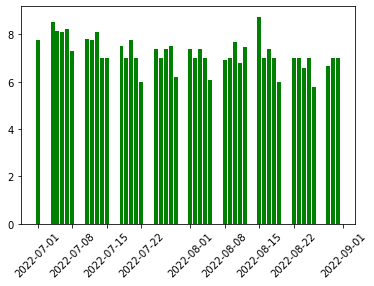

In [23]:
#Brasil - GASOLINA COMUM
gasolina_comum.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)
x=list(gasolina_comum.iloc[:,4])
y=list(gasolina_comum.iloc[:,5])
plt.bar(x,y,color='g')
plt.xticks(rotation=45)

In [24]:
#Brasil - GASOLINA ADITIVADA
gasolina_aditivada.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,7.248261
2022-07-04,6.786824
2022-07-05,6.795097
2022-07-06,6.573684
2022-07-07,6.408225
2022-07-08,6.290370
2022-07-11,6.298553
2022-07-12,6.315667
2022-07-13,6.208035


In [25]:
#Brasil - ETANOL
etanol.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,5.395652
2022-07-04,4.879523
2022-07-05,5.158455
2022-07-06,4.944885
2022-07-07,4.820669
2022-07-08,4.753214
2022-07-11,4.842278
2022-07-12,4.928487
2022-07-13,4.659464


### **Pergunta 2: Qual o preço médio da gasolina e do etanol nesses dois meses?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

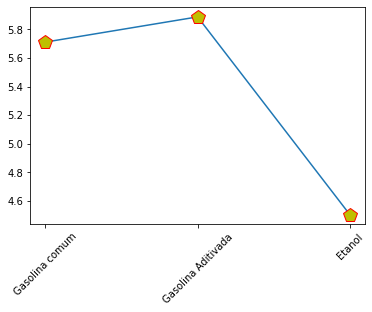

In [26]:
listaCombustiveis=[['Gasolina comum',gasolina_comum.mean()],['Gasolina Aditivada',gasolina_aditivada.mean()],['Etanol',etanol.mean()]]
dfCombustiveis = pd.DataFrame(listaCombustiveis, columns=['Combustivel', 'Média'])
plt.plot(dfCombustiveis['Combustivel'],dfCombustiveis['Média'], marker='p', mfc='y', mec='r', linestyle='-', ms=15)
plt.xticks(rotation=45)

### **Pergunta 3: Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

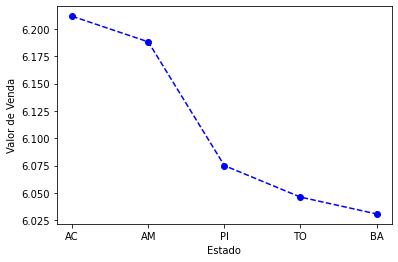

In [27]:
#Para GASOLINA COMUM

gasolina_comum = combustiveis.loc['GASOLINA'] 
plt.ylabel('Valor de Venda')
plt.xlabel('Estado')
plt.plot(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'bo--')


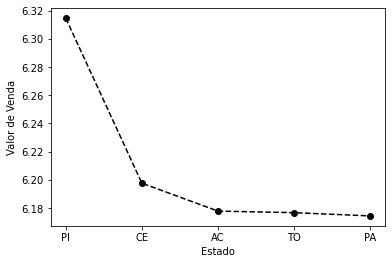

In [28]:
#Para GASOLINA ADITIVADA

gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA'] 
plt.ylabel('Valor de Venda')
plt.xlabel('Estado')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'ko--')

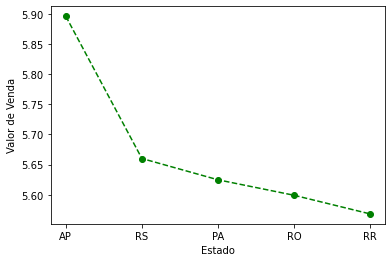

In [29]:
#Para ETANOL

etanol = combustiveis.loc['ETANOL'] 
plt.ylabel('Valor de Venda')
plt.xlabel('Estado')
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'go--')

<function matplotlib.pyplot.show(*args, **kw)>

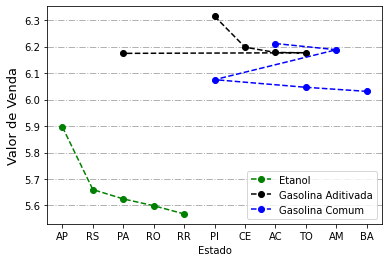

In [30]:
# Os três combustíveis comparados
plt.ylabel('Valor de Venda',fontsize=13)
plt.xlabel('Estado')
axes = plt.gca()
axes.yaxis.grid(color='black', alpha=0.3, linestyle='-.', linewidth=1)
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'go--', label = 'Etanol')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'ko--', label = 'Gasolina Aditivada')
plt.plot(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False).head(), 'bo--', label = 'Gasolina Comum')
plt.legend()

plt.show

### **Pergunta 4: Qual o preço médio da gasolina e do etanol por estado?**

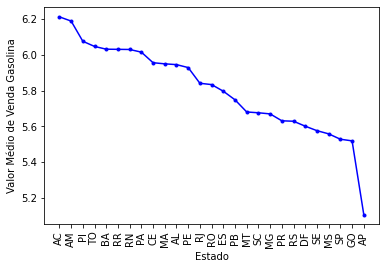

In [31]:
#GASOLINA COMUM
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Gasolina')
plt.xlabel('Estado')
plt.plot(gasolina_comum.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'bo-', ms=3)

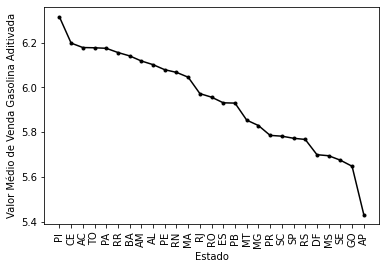

In [32]:
#GASOLINA ADITIVADA
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Gasolina Aditivada')
plt.xlabel('Estado')
plt.plot(gasolina_aditivada.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'ko-', ms=3)

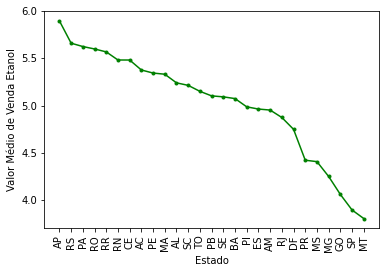

In [33]:
#GASOLINA ETANOL
plt.xticks(rotation=90)
plt.ylabel('Valor Médio de Venda Etanol')
plt.xlabel('Estado')
plt.plot(etanol.groupby('Estado - Sigla')[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = False), 'go-', ms=3)

### **Pergunta 5: Qual o município que possui o menor preço para a gasolina e para o etanol?**

In [34]:
gasolina_comum.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA,PASSO FUNDO,RS,4.13


In [35]:
gasolina_aditivada.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA ADITIVADA,PASSO FUNDO,RS,4.13


In [36]:
etanol.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].min().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
ETANOL,PRESIDENTE PRUDENTE,SP,2.89


### **Pergunta 6: Qual o município que possui o maior preço para a gasolina e para o etanol?**

In [37]:
gasolina_comum.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA,SANTANA,AP,5.59


In [38]:
gasolina_aditivada.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
GASOLINA ADITIVADA,SANTANA,AP,5.53


In [39]:
etanol.groupby(['Produto','Municipio', 'Estado - Sigla'])[['Valor de Venda']].max().sort_values(['Valor de Venda'], ascending = True).head(1)

,,,Valor de Venda
Produto,Municipio,Estado - Sigla,
ETANOL,VARZEA GRANDE,MT,3.99


### **Pergunta 7: Qual a região que possui o maior valor médio da gasolina?**

In [40]:
gasolina_comum.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
GASOLINA,CO,5.581603


In [41]:
gasolina_aditivada.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
GASOLINA ADITIVADA,CO,5.721266


### **Pergunta 8: Qual a região que possui o menor valor médio do etanol?**

In [42]:
etanol.groupby(['Produto', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Valor de Venda'], ascending = True).head(1)

,,Valor de Venda
Produto,Regiao - Sigla,
ETANOL,CO,4.107305


### **Pergunta 9: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

In [43]:
#1 - Fazer uma cópia dos dataframe originais
copia = combustiveis.copy()

In [44]:
# 2 - Valores numéricos para a coluna 'Regiao - Sigla':

nova_regiao = {'N': 1, 'NE': 2, 'CO': 3, 'SE': 4, 'S': 5}
copia['Regiao - Sigla'] = copia['Regiao - Sigla'].map(nova_regiao)

In [45]:
# 3 -Valores numéricos para a coluna 'Estado - Sigla':

novo_estado = {'AC': 1, 'AP': 2, 'AM': 3, 'PA': 4, 'RO': 5, 'RR': 6, 'TO': 7,
               'AL': 8, 'BA': 9, 'CE': 10, 'MA': 11, 'PB': 12, 'PE': 13, 'PI': 14, 'RN': 15, 'SE': 16,
               'DF': 17, 'GO': 18, 'MT': 19, 'MS': 20,
               'ES': 21, 'MG': 22, 'RJ': 23, 'SP': 24,
                'PR': 25, 'SC': 26, 'RS': 27}
copia['Estado - Sigla'] = copia['Estado - Sigla'].map(novo_estado)

In [46]:
#CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO PARA TODOS OS COMBUSTÍVEIS

correlacao = copia[['Valor de Venda', 'Regiao - Sigla', 'Estado - Sigla']].corr()

display(correlacao)

,Valor de Venda,Regiao - Sigla,Estado - Sigla
Valor de Venda,1.000000,-0.211984,-0.257194
Regiao - Sigla,-0.211984,1.000000,0.962110
Estado - Sigla,-0.257194,0.962110,1.000000


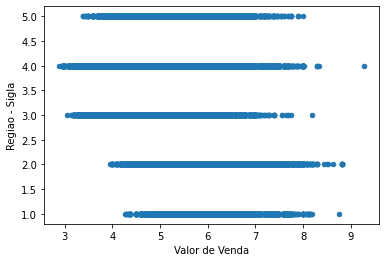

In [47]:
#GRÁFICO DE DISPERSÃO (SCATTERPLOT)

copia.plot(x="Valor de Venda", y="Regiao - Sigla", kind="scatter")

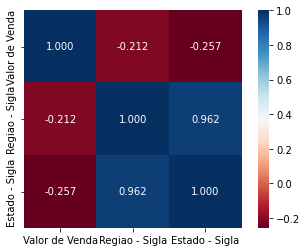

In [50]:
# MAPA DE CALOR (HEATMAP)

sns.heatmap(correlacao, cmap='RdBu', fmt= '.3f', square=True, linecolor='white', annot=True);

In [51]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DA GASOLINA COMUM
copia_gasolina_comum = copia.loc["GASOLINA"]
(copia_gasolina_comum.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.964520,-0.246763
Estado - Sigla,0.964520,1.000000,-0.274433
Valor de Venda,-0.246763,-0.274433,1.000000


In [52]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DA GASOLINA ADITIVADA

copia_gasolina_aditivada = copia.loc["GASOLINA ADITIVADA"]
(copia_gasolina_aditivada.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.964308,-0.221464
Estado - Sigla,0.964308,1.000000,-0.237708
Valor de Venda,-0.221464,-0.237708,1.000000


In [53]:
# CORRELAÇÃO REGIÕES COM O PREÇO MÉDIO DO ETANOL 

copia_etanol = copia.loc["ETANOL"]
(copia_etanol.corr())

,Regiao - Sigla,Estado - Sigla,Valor de Venda
Regiao - Sigla,1.000000,0.956833,-0.415766
Estado - Sigla,0.956833,1.000000,-0.509533
Valor de Venda,-0.415766,-0.509533,1.000000


### **Pergunta 10: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

In [54]:
#Valores numéricos para a coluna 'Bandeira':

nova_bandeira = {'VIBRA ENERGIA': 1, 'IPIRANGA': 2, 'BRANCA': 3, 'RAIZEN': 4, 'REJAILE': 5,            
                'RODOIL': 6, "ATEM' S": 7, 'ALESAT':8, 'SP': 9, 'TOTALENERGIES': 10, 'SABBÁ': 11,
                'FEDERAL ENERGIA': 12, 'DISLUB': 13, 'TEMAPE': 14, 'ESTRADA': 15, 'IDAZA': 16, 'STANG': 17,
                'RAIZEN MIME':18, 'PETROX DISTRIBUIDORA':19, 'PETROBAHIA':20, 'TAURUS':21,
                'CIAPETRO':22, 'CHARRUA':23, 'EQUADOR':24, 'SETTA DISTRIBUIDORA':25,
                'MASUT DISTRIBUIDORA':26, 'RIO BRANCO':27, 'RZD DISTRIBUIDORA':28,
                'SUL COMBUSTÍVEIS':29, 'SIMARELLI':30, 'SMALL':31, 'TDC DISTRIBUIDORA':32,
                 'PETROSERRA':33, 'ATLÂNTICA':34, 'FAN':35, 'MAXSUL':36, 'DIBRAPE':37,
                 'WALENDOWSKY':38, 'WATT':39, 'POTENCIAL':40,'ROYAL FIC':41, 'UNI':42,
                 'MONTEPETRO':43, 'TORRAO':44, 'PELIKANO':45, 'AMERICANOIL':46, 'LARCO':47,
                 'RUFF C.J.':48, 'PETRONAC':49}

copia['Bandeira'] = copia['Bandeira'].map(nova_bandeira)


In [55]:
correlacao_2 = copia[['Valor de Venda', 'Regiao - Sigla', 'Estado - Sigla', 'Bandeira']].corr()

display(correlacao_2)

,Valor de Venda,Regiao - Sigla,Estado - Sigla,Bandeira
Valor de Venda,1.000000,-0.211984,-0.257194,0.035793
Regiao - Sigla,-0.211984,1.000000,0.962110,-0.041783
Estado - Sigla,-0.257194,0.962110,1.000000,-0.060139
Bandeira,0.035793,-0.041783,-0.060139,1.000000


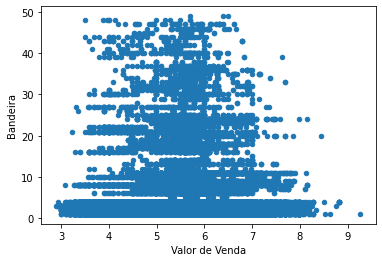

In [59]:
#Gráfico de Dispersão (Scatter Plot)

copia.plot(x="Valor de Venda", y="Bandeira", kind="scatter")

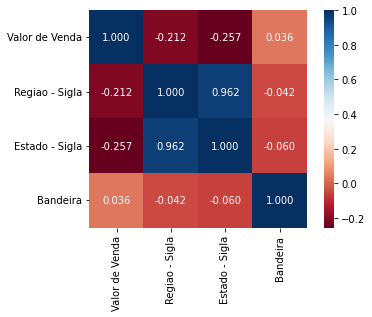

In [60]:
#Mapa de Calor

sns.heatmap(correlacao_2, cmap='RdBu', fmt= '.3f', square=True, linecolor='white', annot=True);

### **2ª Pergunta Extra: Através do coeficiente de variação, explique se as bases de dados utilizadas são mais ou menos homogêneas (Para o Brasil, regiões, estados e municípios).**


PS: Há algum padrão de C.V para a indústria de combustível?

### **3ª PERGUNTA EXTRA - Há correlação na quantidade de postos pesquisados e a variação nos dados (coeficiente de variação)?**